# "Оконные функции"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


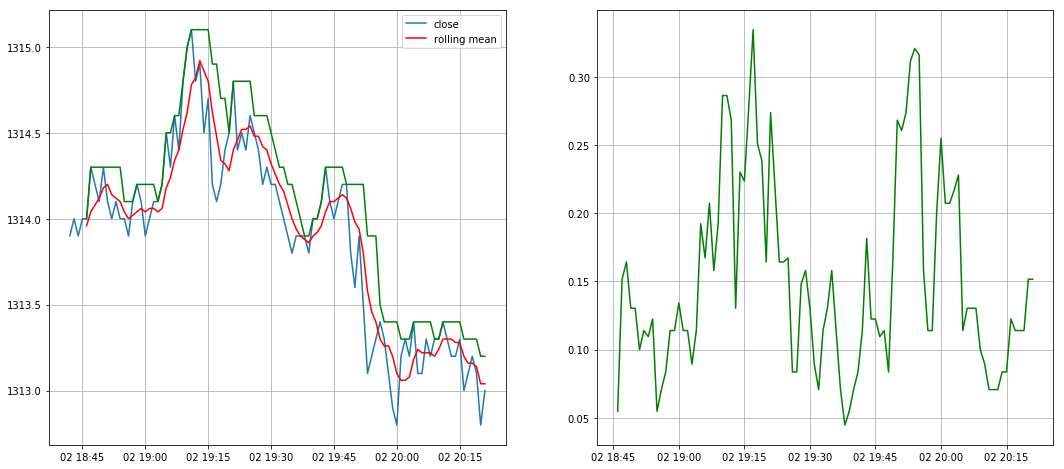

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [3]:
df = pd.read_csv('../data/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df = df.reset_index(drop=True)

def myMax(value):
    return max(value)

## делаем оконное среднее с окном в 10 точек
df['rolling_mean'] = df.close.rolling(window=5).mean()
df['rolling_std']  = df.close.rolling(window=5).std()
df['rolling_max']  = df.close.rolling(window=5).apply(myMax, raw=False)

## визуализируем
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close) ## исходные данные
ax[0].plot(df.ts, df.rolling_mean, c='r') ## оконное среднее
ax[0].plot(df.ts, df.rolling_max,  c='g') ## оконный максимум
ax[0].legend(['close', 'rolling mean'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

# Cкользящее среднее

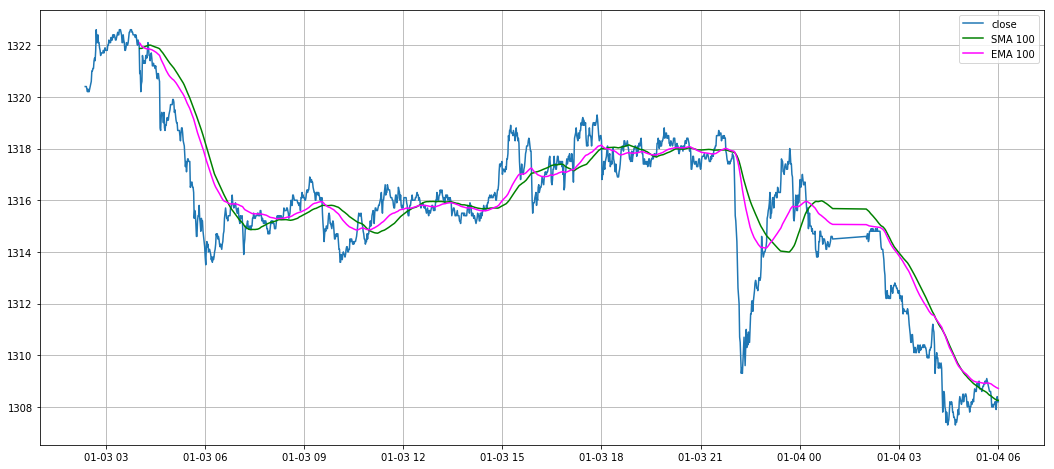

In [4]:
df = pd.read_csv('../data/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1400:3000]

N = 100

## делаем оконное среднее с окном в N точек
df['rolling_mean_' + str(N)] = df.close.rolling(window=N).mean()
## экспоненциально среднее с окном в N точек
df['rolling_ema_' + str(N)] = df.close.ewm(min_periods=N, span=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_mean_' + str(N)],  c='g') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_'  + str(N)],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

# Задания

In [25]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

In [26]:
data = pd.read_csv('../data/gold_clean.csv')
data = data.rename(columns = {'ts': 'unixtime'})
data['ts'] = pd.to_datetime(data.unixtime)
data = data[(data.ts >= '2018-01-10') & (data.ts <= '2018-01-11')]

fig = go.Figure(data  = [go.Candlestick(
            x=data['ts'],
            open  = data['open'],
            high  = data['high'],
            low   = data['low'],
            close = data['close']
        )])

fig.show()

data = data.reset_index(drop=True)
data.head()

,unixtime,open,high,low,close,vol,ts
0,1515542400000000000,1314.8,1315.0,1314.7,1314.9,247,2018-01-10 00:00:00
1,1515542460000000000,1314.9,1315.2,1314.8,1315.0,395,2018-01-10 00:01:00
2,1515542520000000000,1315.0,1315.1,1315.0,1315.1,67,2018-01-10 00:02:00
3,1515542580000000000,1315.1,1315.1,1314.8,1314.9,39,2018-01-10 00:03:00
4,1515542640000000000,1314.8,1314.9,1314.8,1314.9,22,2018-01-10 00:04:00


Задание 8.12.1

Постройте скользящее среднее на колонке с ценами закрытия (close) с окном в 100. Укажите, округлённое до одного знака после запятой, значение скользящего среднего в момент, когда оно впервые оказывается меньше значения close.

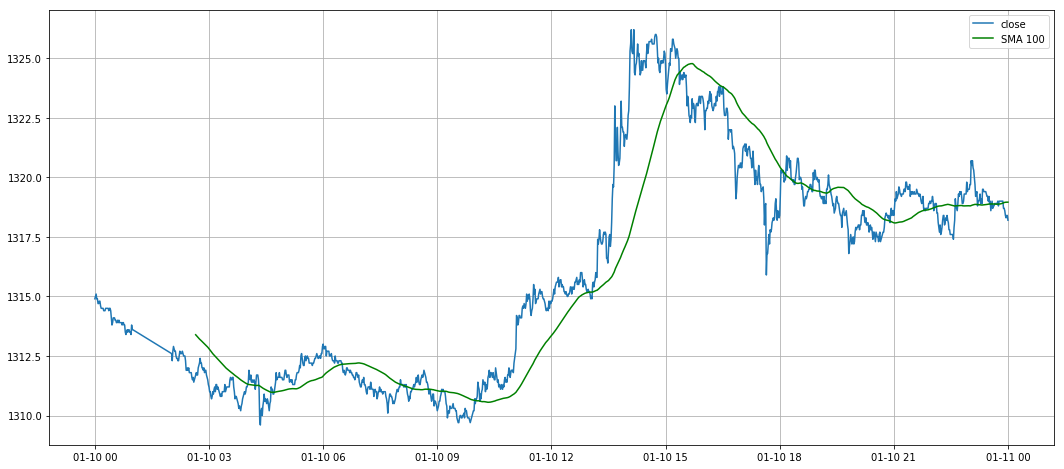

In [27]:
N = 100

## делаем оконное среднее с окном в N точек
data['rolling_mean_' + str(N)] = data.close.rolling(window=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(data.ts, data.close) ## исходные данные
ax.plot(data.ts, data['rolling_mean_' + str(N)],  c='g') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N)])
ax.grid()

In [19]:
data.query(f'rolling_mean_{N} < close').sort_values(by=['unixtime']).head(1)

,unixtime,open,high,low,close,vol,ts,rolling_mean_100
182,1515556920000000000,1311.4,1311.4,1311.3,1311.4,107,2018-01-10 04:02:00,1311.306


Задание 8.12.2

Постройте скользящее квадратическое отклонение на колонке с ценами закрытия (close) с окном в 100. Укажите, округлённое до четырёх знаков после запятой, значение скользящего квадратического отклонения в момент, когда оно впервые становится не NaN.

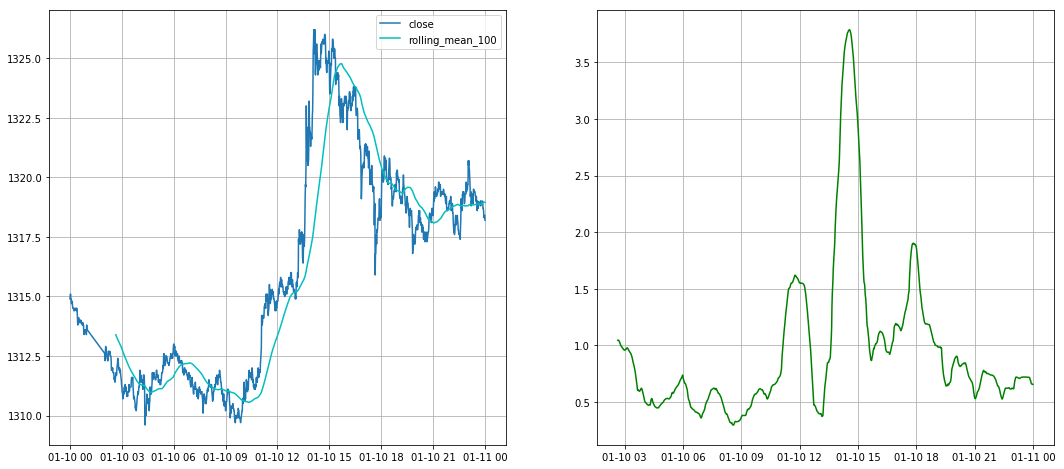

In [31]:
N = 100

## делаем оконное среднее с окном в N точек
data['rolling_std_' + str(N)] = data.close.rolling(window=N).std()

## визуализируем
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(data.ts, data.close) ## исходные данные
ax[0].plot(data.ts, data['rolling_mean_' + str(N)],  c='c') ## оконный максимум
ax[0].legend(['close', 'rolling_mean_' + str(N)])
ax[0].grid()

ax[1].plot(data.ts, data['rolling_std_' + str(N)],  c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

In [23]:
data.query(f'rolling_std_{N} == rolling_std_{N}').sort_values(by=['unixtime']).head(1)

,unixtime,open,high,low,close,vol,ts,rolling_mean_100,rolling_std_100
99,1515551940000000000,1311.6,1311.7,1311.5,1311.7,10,2018-01-10 02:39:00,1313.391,1.044862


Задание 8.12.3

Постройте так называемые линии Боллинджера с окном в 100: 

 - добавьте к скользящему среднему скользящее стандартное отклонение, умноженное на три — верхняя линия Боллинджера; 
 - отнимите от скользящего среднего скользящее стандартное отклонение, умноженное на три — нижняя линия Боллинджера.

 upper = rolling_mean + 3 * rolling_std
 
 lower = rolling_mean - 3 * rolling_std

Укажите, сколько точек колонки close лежат выше, чем верхняя линия Боллинджера?

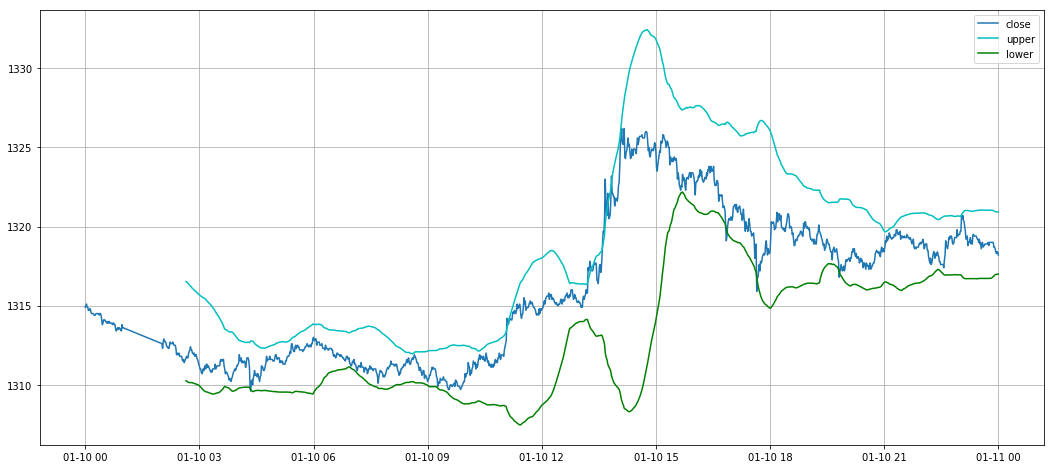

In [33]:
N = 100

## делаем оконное среднее с окном в N точек
data['rolling_std_' + str(N)] = data.close.rolling(window=N).std()
data['rolling_mean_' + str(N)] = data.close.rolling(window=N).mean()
data['upper'] = data['rolling_mean_' + str(N)] + 3*data['rolling_std_' + str(N)]
data['lower'] = data['rolling_mean_' + str(N)] - 3*data['rolling_std_' + str(N)]

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(data.ts, data.close) ## исходные данные
ax.plot(data.ts, data['upper'],  c='c') ## верхняя линия Боллинджера
ax.plot(data.ts, data['lower'],  c='g') ## нижняя линия Боллинджера
ax.legend(['close', 'upper', 'lower'])
ax.grid()

plt.show()

In [37]:
data.query('close > upper').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 605 to 770
Data columns (total 11 columns):
unixtime            15 non-null int64
open                15 non-null float64
high                15 non-null float64
low                 15 non-null float64
close               15 non-null float64
vol                 15 non-null int64
ts                  15 non-null datetime64[ns]
rolling_mean_100    15 non-null float64
rolling_std_100     15 non-null float64
upper               15 non-null float64
lower               15 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 1.4 KB


И сколько точек той же колонки лежат ниже, чем нижняя линия Боллинджера?

In [38]:
data.query('close < lower')
#.info()

,unixtime,open,high,low,close,vol,ts,rolling_mean_100,rolling_std_100,upper,lower
201,1515558060000000000,1309.8,1310.1,1308.9,1309.6,1356,2018-01-10 04:21:00,1311.219,0.515555,1312.765665,1309.672335
950,1515603000000000000,1321.1,1321.1,1319.3,1320.0,2379,2018-01-10 16:50:00,1323.271,1.074055,1326.493166,1320.048834
951,1515603060000000000,1320.0,1320.1,1319.0,1319.1,2218,2018-01-10 16:51:00,1323.204,1.122580,1326.571740,1319.836260
952,1515603120000000000,1319.1,1319.7,1319.0,1319.4,1199,2018-01-10 16:52:00,1323.140,1.155050,1326.605151,1319.674849
999,1515605940000000000,1319.0,1319.0,1315.2,1315.9,5739,2018-01-10 17:39:00,1321.497,1.575344,1326.223031,1316.770969
1129,1515613740000000000,1317.8,1317.8,1316.6,1316.8,1313,2018-01-10 19:49:00,1319.413,0.760602,1321.694807,1317.131193


Задание 8.12.4

Напишите свою скользящую функцию, которая будет являтся средним арифметическим между максимальным и минимальным значением цены закрытия close, используя окно 50. Укажите последнее значение этой функции.

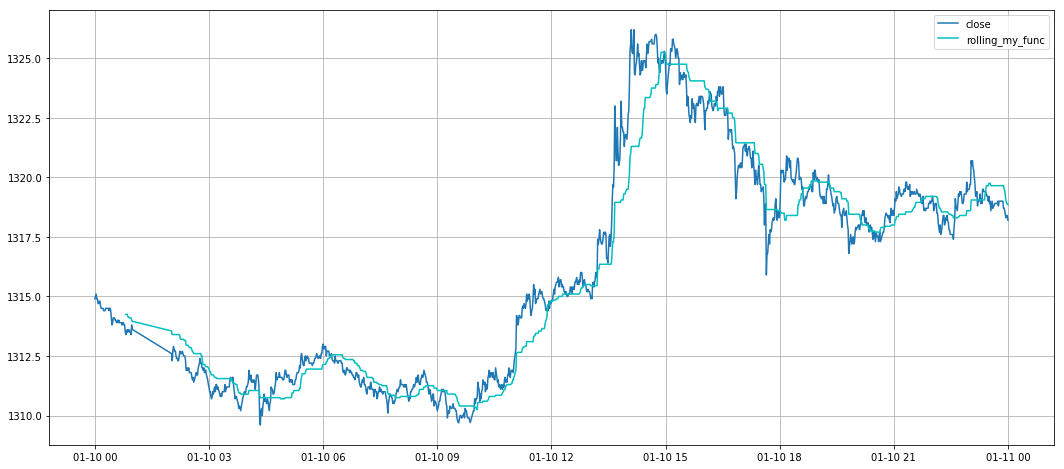

In [42]:
N = 50

def myFunc(value):
    return (max(value) + min(value)) / 2

## делаем оконное среднее с окном в N точек
data['rolling_my_func']  = data.close.rolling(window=N).apply(myFunc, raw=False)

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(data.ts, data.close) ## исходные данные
ax.plot(data.ts, data['rolling_my_func'],  c='c')
ax.legend(['close', 'rolling_my_func'])
ax.grid()

plt.show()

In [45]:
data.sort_values(by=['ts']).tail(1)

,unixtime,open,high,low,close,vol,ts,rolling_mean_100,rolling_std_100,upper,lower,rolling_my_func
1380,1515628800000000000,1318.4,1318.4,1318.1,1318.2,182,2018-01-11,1318.958,0.654924,1320.922772,1316.993228,1318.85


Задание 8.12.5

Постройте скользящее среднее с окном 500 и экспоненциальное скользящее среднее с окном 100 (span=100). Укажите индексы дейтафрейма, на которых одно скользящее пересекается с другим. Для этого вычтите из одно скользящего среднего другое, возьмите знак этой разности (np.sign), продифференциируйте его (diff()) и оставьте только те точки, где результат дифференциирования не равен нулю.

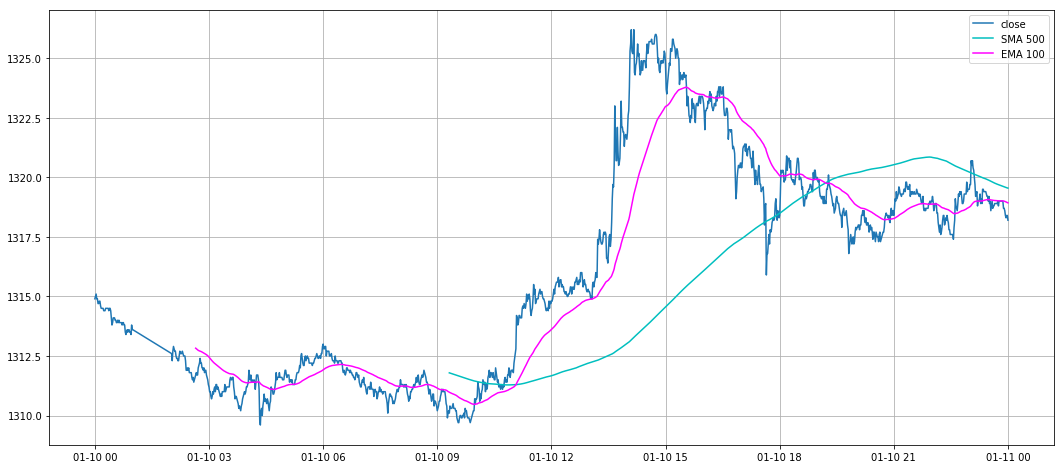

In [47]:
N, M = 500, 100

## делаем оконное среднее с окном в N точек
data['rolling_mean_' + str(N)] = data.close.rolling(window=N).mean()
## экспоненциально среднее с окном в M точек
data['rolling_ema_' + str(M)] = data.close.ewm(min_periods=M, span=M).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(data.ts, data.close) ## исходные данные
ax.plot(data.ts, data['rolling_mean_' + str(N)],  c='c')
ax.plot(data.ts, data['rolling_ema_'  + str(M)],  c='magenta')
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(M)])
ax.grid()

plt.show()

In [54]:
data['mean_cross'] = np.sign(data['rolling_mean_' + str(N)] - data['rolling_ema_'  + str(M)]).diff()

In [56]:
data.query('mean_cross > 0 or mean_cross < 0')

,unixtime,open,high,low,close,vol,ts,rolling_mean_100,rolling_std_100,upper,lower,rolling_my_func,rolling_mean_500,rolling_ema_100,mean_cross
605,1515582300000000000,1312.8,1314.5,1312.7,1314.2,2378,2018-01-10 11:05:00,1311.009,0.849967,1313.558900,1308.459100,1312.6,1311.2966,1311.343864,-2.0
1093,1515611580000000000,1319.0,1319.1,1318.6,1318.9,248,2018-01-10 19:13:00,1319.339,0.985234,1322.294702,1316.383298,1319.8,1319.7718,1319.754460,2.0
